**set seed for reproducibility**

In [46]:
# setting seeds 
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [47]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

Upload the kaggle.json file

In [48]:
!pip install kaggle

In [49]:
kaggle_credentails = json.load(open("kaggle.json"))

In [50]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [51]:
# downloading dataset
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [52]:
# extract dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [53]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


# No of Classes = 38

In [54]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


**Data Preprocessing**

In [55]:
# dataset 
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


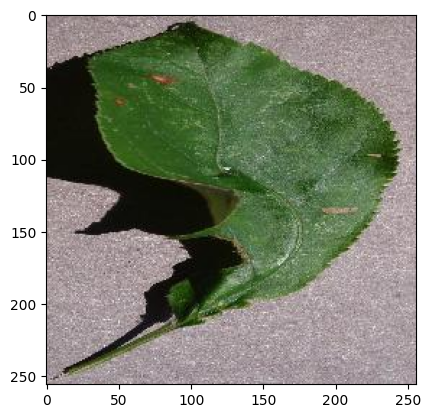

In [56]:
image_path = r"D:\Project\Plantex-main\Backend\plantvillage dataset\color\Apple___Black_rot\0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG"

# read the image
img = mpimg.imread(image_path)

print(img.shape)
# display the image
plt.imshow(img)
plt.show()

In [57]:
image_path = r"D:\Project\Plantex-main\Backend\plantvillage dataset\color\Apple___Black_rot\0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG"

# read the image
img = mpimg.imread(image_path)

print(img)

[[[154 138 141]
  [156 140 143]
  [152 136 139]
  ...
  [173 158 161]
  [165 150 153]
  [167 152 155]]

 [[152 136 139]
  [158 142 145]
  [157 141 144]
  ...
  [155 140 143]
  [155 140 143]
  [167 152 155]]

 [[147 131 134]
  [159 143 146]
  [159 143 146]
  ...
  [148 133 136]
  [150 135 138]
  [164 149 152]]

 ...

 [[ 83  71  73]
  [159 147 149]
  [185 173 175]
  ...
  [153 140 147]
  [173 160 167]
  [171 158 165]]

 [[164 152 152]
  [186 174 174]
  [174 162 162]
  ...
  [159 146 153]
  [157 144 151]
  [155 142 149]]

 [[148 137 135]
  [154 143 141]
  [143 131 131]
  ...
  [193 180 187]
  [178 165 172]
  [164 151 158]]]


In [58]:
# set image params
img_size = 224
batch_size = 32

**Train Test Split**

In [59]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation
)

In [60]:
# train
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [61]:
# test 
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Making model**

In [62]:
# model 
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [63]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [65]:
# training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # no of steps per epoch
    epochs=5,  # counts 
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # test steps
)

Epoch 1/5


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 794s 583ms/step - accuracy: 0.6063 - loss: 1.8586 - val_accuracy: 0.8567 - val_loss: 0.4458
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 53us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.5094
Epoch 3/5


c:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 774s 570ms/step - accuracy: 0.9177 - loss: 0.2582 - val_accuracy: 0.8771 - val_loss: 0.4025
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.3100e-04
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 564s 415ms/step - accuracy: 0.9680 - loss: 0.0975 - val_accuracy: 0.8489 - val_loss: 0.5843


**Model testing**

In [66]:
# test
print("Testing model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Testing model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8509 - loss: 0.5767
Validation Accuracy: 84.90%


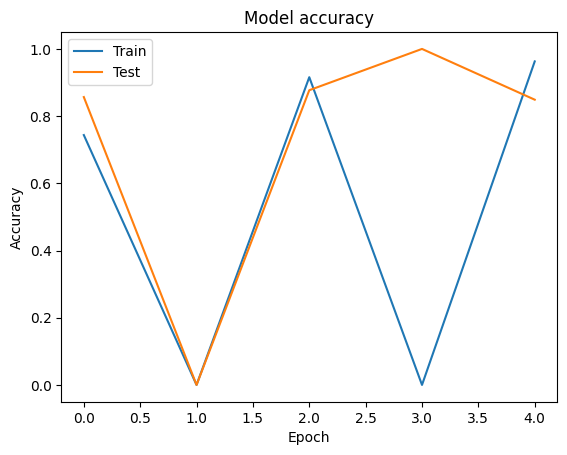

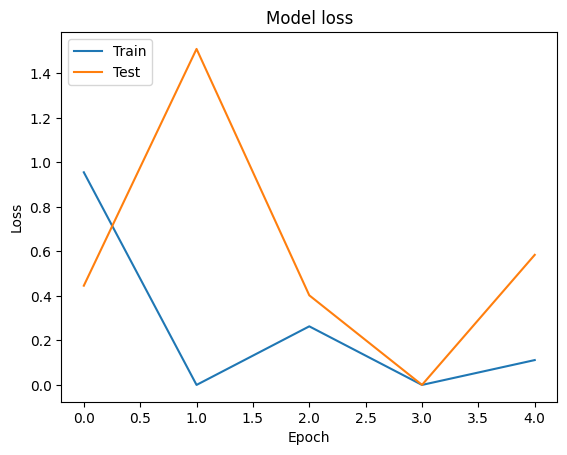

In [67]:
# plotting validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Predictive system**

In [68]:
# load and process the image
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # load 
    img = Image.open(image_path)
    # resize
    img = img.resize(target_size)
    # Convert to a numpy array
    img_array = np.array(img)
    # add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    print(img_array)
    return img_array

# Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [69]:
# Create a mapping from index to disease names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [70]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [71]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [72]:
# !mkdir testing_images

# example 
# image_path = '/content/testing_images/test_apple_black_rot.JPG'
# image_path = '/content/testing_images/test_blueberry_healthy.jpg'
# image_path = '/content/testing_images/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# output the result
print("Predicted Class Name:", predicted_class_name)

[[[[0.6039216  0.5411765  0.5529412 ]
   [0.60784316 0.54509807 0.5568628 ]
   [0.6        0.5372549  0.54901963]
   ...
   [0.6745098  0.6156863  0.627451  ]
   [0.6509804  0.5921569  0.6039216 ]
   [0.654902   0.59607846 0.60784316]]

  [[0.59607846 0.53333336 0.54509807]
   [0.61960787 0.5568628  0.5686275 ]
   [0.6156863  0.5529412  0.5647059 ]
   ...
   [0.60784316 0.54901963 0.56078434]
   [0.59607846 0.5372549  0.54901963]
   [0.6509804  0.5921569  0.6039216 ]]

  [[0.5882353  0.5254902  0.5372549 ]
   [0.63529414 0.57254905 0.58431375]
   [0.6156863  0.5529412  0.5647059 ]
   ...
   [0.6039216  0.54509807 0.5568628 ]
   [0.5882353  0.5294118  0.5411765 ]
   [0.6313726  0.57254905 0.58431375]]

  ...

  [[0.48235294 0.43529412 0.44705883]
   [0.63529414 0.5882353  0.6       ]
   [0.654902   0.60784316 0.6156863 ]
   ...
   [0.654902   0.6039216  0.6313726 ]
   [0.6666667  0.6156863  0.6431373 ]
   [0.6666667  0.6156863  0.6431373 ]]

  [[0.57254905 0.5254902  0.5254902 ]
   [0.7

**save**

In [73]:
# !mkdir trained_models
# model.save('/content/trained_models/plant_disease_prediction_model.h5')

In [75]:
model.save('model.keras')
model.save('model.h5')
# model.save('model.tflite')